## 1. Basic Gradient Descent


C:\Users\junho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\junho\Desktop\Studies\MLstudy\Gradient Descent\gradient.py:32: RuntimeWarning: invalid value encountered in double_scalars
  reg_term=np.linalg.norm(theta)*l2_reg
c:\Users\junho\Desktop\Studies\MLstudy\Gradient Descent\gradient.py:41: RuntimeWarning: invalid value encountered in multiply
  reg_term=2*l2_reg*theta


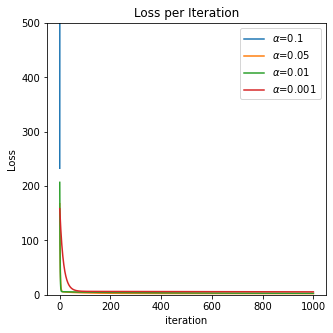

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from gradient import *
import pandas
import csv
## Data Generation

df=pandas.read_csv("data.csv") ## Jupiter Notebook이라 간단하게 표현가능, 실제로는 경로를 더 자세하게 표시해줘야함.
y=df['y']
X=df.loc[:,df.columns!='y']
## 데이터 불러오기
X_train,X_test,y_train,y_test=splitData(X,y)
## 성능 평가를 위해 test set 과 train set을 분리.
X_train,X_test=featurescale(X_train,X_test)
## (Min-Max feature scale)
theta_init=np.random.rand(X_train.shape[1]) 
loss=SquareLossfunction(X_train,y_train,theta_init)
num_iter=1000
alpha_samples=[0.1,0.05,0.01,0.001]
plt.figure(figsize=(5, 5))
index=np.arange(0,num_iter+1,1)
for alpha in alpha_samples:
    g_theta_hist,g_loss_hist, _ =gradDescent(X_train,y_train,alpha=alpha,num_iter=num_iter,backtracking=False)
    plt.plot(index,g_loss_hist,label=r"$\alpha$={}".format(alpha))
plt.title("Loss per Iteration")
plt.xlabel("iteration")
plt.ylabel("Loss")
plt.ylim(0,500)
plt.legend()

## 2. Gradient descent with Backtracking vs Basic Gradient Descent 

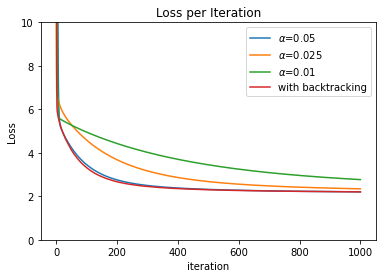

In [8]:
index=np.arange(0,num_iter+1,1)
alpha_samples=[0.05,0.025,0.01]
for alpha in alpha_samples:
    if alpha==0.001:backtrack=True
    g_theta_hist,g_loss_hist, _ =gradDescent(X_train,y_train,alpha=alpha,num_iter=num_iter,backtracking=False)
    plt.plot(index,g_loss_hist,label=r"$\alpha$={}".format(alpha))
b_theta_hist,b_loss_hist,backtracknum=gradDescent(X_train,y_train,num_iter=num_iter,backtracking=True)
plt.plot(index,b_loss_hist,label=r"with backtracking" )
plt.title("Loss per Iteration")
plt.xlabel("iteration")
plt.ylabel("Loss")
plt.ylim(0,10)
plt.legend()

## 3. Stochastic(Mini-Batch) Gradient Descent vs Full Gradient Descent

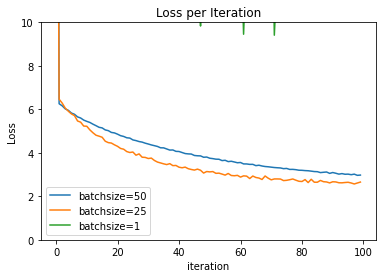

In [17]:
index=np.arange(0,100,1)
batchsize=[50,25,1]
for batchs in batchsize:
    b_loss_hist =minibatchgradDescent(X_train,y_train,alpha=0.03,num_iter=100,batchsize=batchs)
    plt.plot(index,b_loss_hist.mean(axis=1),label=r"batchsize={}".format(batchs))
plt.title("Loss per Iteration")
plt.xlabel("iteration")
plt.ylabel("Loss")
plt.ylim(0,10)
plt.legend()